In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tables
tables.file._open_files.close_all()

## Random Seed

In [ ]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]
beam_energy = 10
dim = 4
num_particles = 10000

In [ ]:
bunch = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution(seed=134)
x = particles[0, :]
xp = particles[1, :]

In [ ]:
bunch2 = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles2 = bunch2.generate_transverse_matched_beam_distribution(seed=12234)
nx = particles2[0,:]
nxp = particles2[1,:]

In [ ]:
print (x)
print (nx)

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Update Twiss Parameters

In [ ]:
d1 = Drift("d1", "drift", 5) #, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker") #, aperture=['circular', 1e-1])

In [ ]:
fodo_list = [qf, d1, qd, d1, m1]

In [ ]:
fodo = Beamline("fodo", fodo_list)

In [ ]:
fodo.get_num_beamline_elements()

In [ ]:
fodo.print_beamline()

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [ ]:
bunch.twiss_x

In [ ]:
bunch.print_bunch_properties()

In [ ]:
fodo.propagate_beamline(bunch)

In [ ]:
bunch.print_bunch_properties()

In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [ ]:
bunch.print_bunch_properties()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Diagnostics

### Particle Diagnostics

In [ ]:
import tables
import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
from elements import *
from beamline import Beamline
from beam import Bunch
from utils import diagnostics

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [ ]:
if os.path.exists("particle.h5"):
    os.remove("particle.h5")

In [ ]:
pdiagnostics = diagnostics.Particle_diagnostics("particle.h5")

In [ ]:
pdiagnostics.save_particle_diagnostics(bunch.particle)

In [ ]:
h5file = tables.open_file("particle.h5")

In [ ]:
h5file.root.particle

In [ ]:
for i in h5file.root.particle:
    if i.name == "species":
        print ("%10s %10s" % (i.name, i.read()[0])) #.decode('ASCII')))
    else:
        print ("%10s %10.5f" % (i.name, i.read()))

In [ ]:
h5file.close()

### Bunch Diagnostics

In [ ]:
if os.path.exists("bunch.h5"):
    os.remove("bunch.h5")

In [ ]:
bdiagnostics = diagnostics.Bunch_diagnostics("bunch.h5")

In [ ]:
bdiagnostics.save_bunch_diagnostics(bunch)

In [ ]:
h5file = tables.open_file("bunch.h5")

In [ ]:
h5file.root

In [ ]:
h5file.root.particles.read()

In [ ]:
h5file.root.diagnostics

In [ ]:
for i in h5file.root.diagnostics:
    print ("%12s %10.5f" % (i.name, i.read()))

In [ ]:
h5file.root.twiss

In [ ]:
for i in h5file.root.twiss:
    print ("%12s %10.5f" % (i.name, i.read()))

In [ ]:
h5file.close()

## Beamline Diagnostics

In [ ]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt
from utils import diagnostics
import os
from tables import *

In [ ]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [ ]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [ ]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [ ]:
fodo = Beamline("fodo", fodo_list)

In [ ]:
bldiagnostics = diagnostics.Beamline_diagnostics("beamline.h5")

In [ ]:
bldiagnostics

In [ ]:
bldiagnostics.save_bunch_diagnostics(bunch)

In [ ]:
h5file = open_file("beamline.h5")

In [ ]:
h5file.root

In [ ]:
h5file.root.beamline.s

In [ ]:
for i in h5file.root.beamline.s:
    print (i)

In [ ]:
h5file.close()

### Beamline Test

In [ ]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [ ]:
fodo2 = Beamline("fodo", fodo_list, True)

In [ ]:
fodo2.propagate_beamline(bunch)

In [ ]:
h5file = open_file("beamline.h5")

In [ ]:
h5file.root

In [ ]:
h5file.root.beamline.s

In [ ]:
for i in h5file.root.beamline.s:
    print (i)

In [ ]:
for i in h5file.root.twiss.emit_x:
    print (i)

In [ ]:
for i in h5file.root.twiss.beta_x:
    print (i)

In [ ]:
h5file.root.twiss.beta_x

In [ ]:
h5file.close()

## FODO Lattice Benchmarking

In [ ]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [ ]:
d1 = Drift("d1", "drift", 0.55) #, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.50, 22.5)
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [ ]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [ ]:
fodo = Beamline("fodo", fodo_list, True)

In [ ]:
fodo.get_num_beamline_elements()

In [ ]:
fodo.print_beamline()

In [ ]:
twiss_x = [0, 9.818144678, 3.4187e-6]
twiss_y = [0, 1.237442734, 3.4187e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0,:]
xp = particles[1,:]
y = particles[2,:]

In [ ]:
bunch.twiss_x

In [ ]:
bunch.print_bunch_properties()

In [ ]:
fodo.propagate_beamline(bunch)

In [ ]:
bunch.print_bunch_properties()

In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [ ]:
bunch.print_bunch_properties()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### FODO Lattice Benchmarking with Synergia2

In [ ]:
h5file = tables.open_file("syn_particles_0000.h5")

In [ ]:
syn_particles_x = h5file.root.particles[:,0]
syn_particles_xp = h5file.root.particles[:,1]
syn_particles_y = h5file.root.particles[:,2]

In [ ]:
h5file.close()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x*1e3, syn_particles_xp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_xp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x, syn_particles_y, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_y, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [ ]:
h5file = open_file("beamline.h5")

In [ ]:
h5file.root

In [ ]:
s = []
for i in h5file.root.beamline.s:
    s.append(i)
std_x = []
for i in h5file.root.diagnostics.std_x:
    std_x.append(i)
std_y = []
for i in h5file.root.diagnostics.std_y:
    std_y.append(i)
beta_x = []
for i in h5file.root.twiss.beta_x:
    beta_x.append(i)
h5file.close()

In [ ]:
h5file = tables.open_file("syn_diagnostics.h5")
syn_s = h5file.root.s_n[:]
syn_x = h5file.root.std[0,:]
syn_y = h5file.root.std[2,:]
h5file.close()

In [ ]:
print (len(syn_s), len(syn_x), len(syn_y))

In [ ]:
plt.figure(1)

plt.plot(s, std_x, 'r*-')
plt.plot(s, std_y, 'g*--')
plt.plot(syn_s, syn_x, 'bo-.')
plt.plot(syn_s, syn_y, 'kx:')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\sigma_{x}$ and $\sigma_{y}$ (m)", fontsize=20)
plt.grid(1)
plt.show()

In [ ]:
h5file = tables.open_file("syn_twiss.h5")
syn_s = h5file.root.s[:]
syn_beta_x = h5file.root.beta_x[:]
h5file.close()

In [ ]:
plt.figure(1)

plt.plot(s, beta_x, 'r*-')
plt.plot(syn_s, syn_beta_x, 'bo-.')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\beta_{x}$ (m)", fontsize=20)
plt.grid(1)
plt.show()

## RF Cavity

### Transfer Matrix of an RF Cavity

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tables
tables.file._open_files.close_all()

In [2]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [3]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [4]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.963313571028021e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.929058130659136e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [5]:
rfcavity = Rfcavity("rfcav", "rfcavity", length=1.0, strength=10, phase=0) #, freq=3e9)

In [6]:
rfcavity.get_element_property("phase") * 180 / np.pi

The element's phase is 0.0


0.0

In [7]:
rfcavity.get_transfer_matrix(bunch)

array([[ 0.87846566,  0.24815337,  0.        ,  0.        ],
       [-0.0431639 ,  0.57116113,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.87846566,  0.24815337],
       [ 0.        ,  0.        , -0.0431639 ,  0.57116113]])

In [8]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.963313571028021e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.929058130659136e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 0


In [9]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [10]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.963313571028021e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.929058130659136e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [11]:
rfcavity.propagate(bunch)

In [12]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 8.391015341392135 m
alpha_x                   : -0.40343530988580434 m^(1/2)
emittance_x               : 5.1057668492346245e-06 mm-mrad
beta_y                    : 7.083050057219886 m
alpha_y                   : 1.0696672089766317 m^(1/2)
emittance_y               : 5.08821241911512e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 1.0


In [13]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

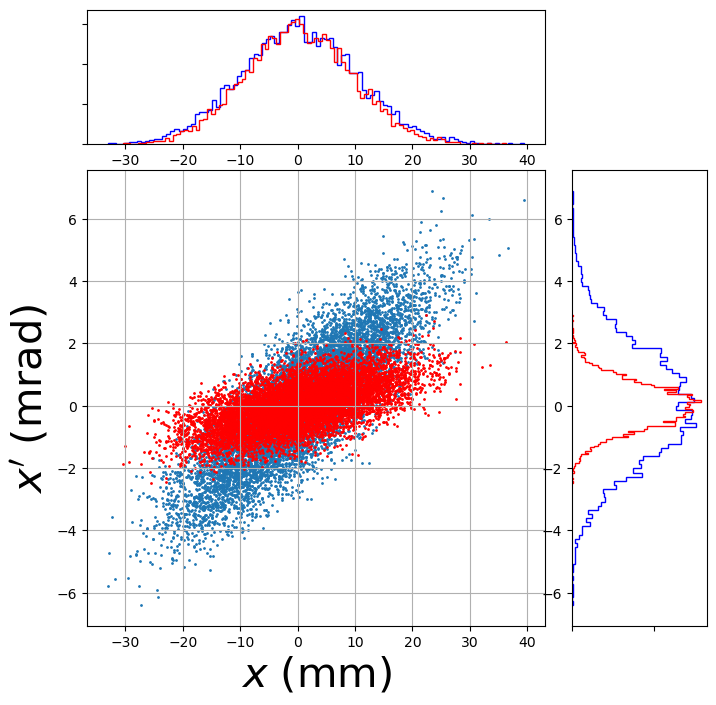

In [14]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

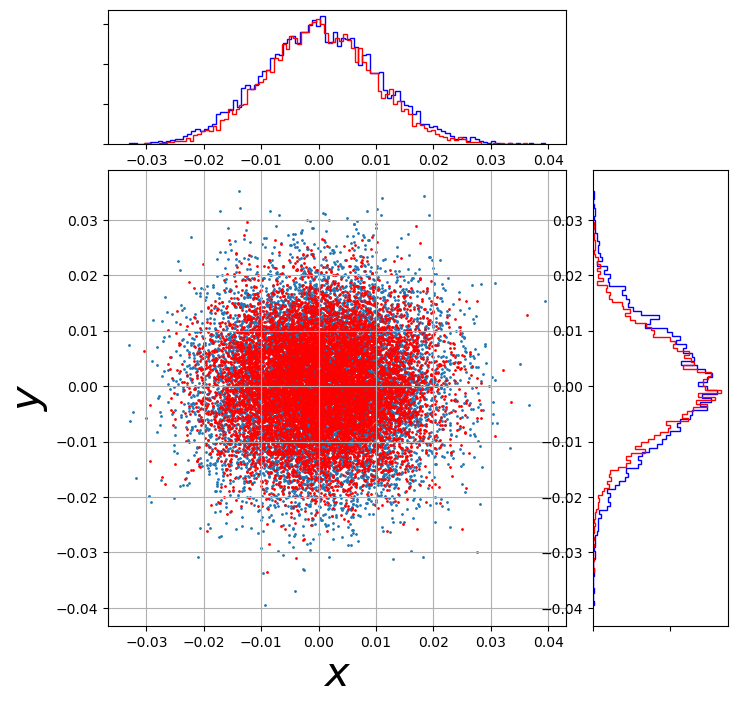

In [15]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Slice an RF Cavity

In [9]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [16]:
sliced_rf_cavity = rfcavity.slice_element(4)

In [18]:
for i in sliced_rf_cavity:
    print (i.print_element_properties())

element name     : rfcav_sliced_0
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_1
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_2
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
element name     : rfcav_sliced_3
element type     : rfcavity
element length   : 0.25
element strength : 10
element aperture : Not defined
None
